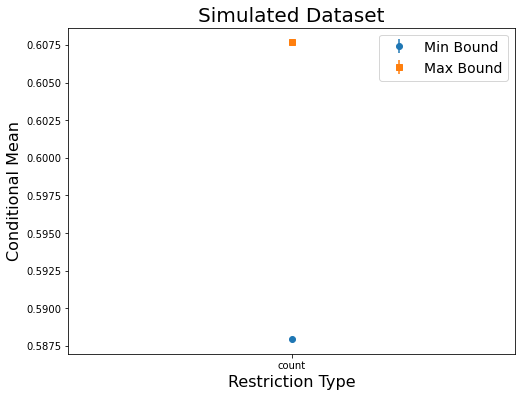

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# df = pd.read_csv('../experiment_artifacts/Dec01-0126/plotting_df.csv')
df = pd.read_csv('../experiment_artifacts/Dec01-0138/plotting_df.csv')
# Generate the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Group by restriction type and calculate mean and std
grouped = df.groupby("restriction_type").agg(
    min_bound_mean=("min_bound", "mean"),
    min_bound_std=("min_bound", "std"),
    max_bound_mean=("max_bound", "mean"),
    max_bound_std=("max_bound", "std"),
)

# Plot error bars for min and max bounds
ax.errorbar(
    grouped.index,
    grouped["min_bound_mean"],
    yerr=grouped["min_bound_std"],
    fmt="o",
    label="Min Bound",
)
ax.errorbar(
    grouped.index,
    grouped["max_bound_mean"],
    yerr=grouped["max_bound_std"],
    fmt="s",
    label="Max Bound",
)

# Add titles and labels
ax.set_title("Simulated Dataset", fontsize=20)
ax.set_xlabel("Restriction Type", fontsize=16)
ax.set_ylabel("Conditional Mean", fontsize=16)
ax.legend(fontsize=14)

plt.show()


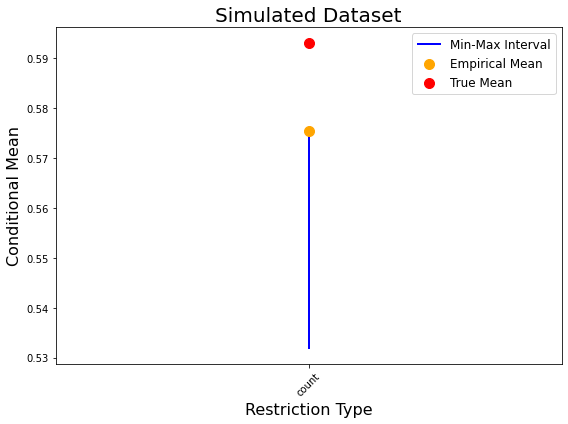

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the data
# df = pd.read_csv('../experiment_artifacts/Dec01-0138/plotting_df.csv')
#their data
# df = pd.read_csv('../experiment_artifacts/Dec01-1915/plotting_df.csv')
df = pd.read_csv('../experiment_artifacts/Dec01-1932/plotting_df.csv')


# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Get the unique restriction types
restriction_types = df['restriction_type'].unique()

# Initialize lists to hold data for plotting
centers = []
medians_min = []
medians_max = []
lower_errors_min = []
upper_errors_min = []
lower_errors_max = []
upper_errors_max = []

for idx, restriction_type in enumerate(restriction_types):
    # Filter data for the current restriction type
    df_sub = df[df['restriction_type'] == restriction_type]
    
    # Compute medians
    median_min = df_sub['min_bound'].median()
    median_max = df_sub['max_bound'].median()
    
    # Compute 5th and 95th percentiles for confidence intervals
    ci_min = np.percentile(df_sub['min_bound'], [5, 95])
    ci_max = np.percentile(df_sub['max_bound'], [5, 95])
    
    # Append data for plotting
    centers.append(idx)
    medians_min.append(median_min)
    medians_max.append(median_max)
    lower_errors_min.append(median_min - ci_min[0])
    upper_errors_min.append(ci_min[1] - median_min)
    lower_errors_max.append(median_max - ci_max[0])
    upper_errors_max.append(ci_max[1] - median_max)

# Plot vertical lines (whiskers) between min and max medians
ax.vlines(
    x=0,
    ymin=df['min_bound'][0],
    ymax=df['max_bound'][0],
    color='blue',
    linewidth=2,
    label='Min-Max Interval'
)

# ax.lines(
#     y=centers,
#     xmin=medians_min,
#     yxmax=medians_max,
#     color='blue',
#     linewidth=2,
#     label='Median Interval'
# )

ax.scatter(
    x=0,
    y=df['empirical_conditional_mean'][0],
    color='orange',
    s=100,
    label='Empirical Mean',
    zorder=3
)
ax.scatter(
    x=0,
    y=df['true_conditional_mean'][0],
    color='red',
    s=100,
    label='True Mean',
    zorder=3
)



# ax.hlines(
#     y=centers,  # y-coordinates for each restriction type
#     xmin=medians_min,  # Min bound medians
#     xmax=medians_max,  # Max bound medians
#     color='blue',      # Line color
#     linewidth=2,       # Line width
#     label='Median Interval'  # Legend label
# )

# Plot markers for min and max medians
# ax.plot(
#     centers,
#     medians_min,
#     '-',
#     color='blue',
#     label='Min Bound Median'
# )
# ax.plot(
#     centers,
#     medians_max,
#     '-',
#     color='blue',
#     label='Max Bound Median'
# )

# # Add error bars for confidence intervals
# ax.errorbar(
#     centers,
#     medians_min,
#     yerr=[lower_errors_min, upper_errors_min],
#     fmt='none',
#     ecolor='blue',
#     capsize=5,
#     label='Min Bound 90% CI'
# )
# ax.errorbar(
#     centers,
#     medians_max,
#     yerr=[lower_errors_max, upper_errors_max],
#     fmt='none',
#     ecolor='blue',
#     capsize=5,
#     label='Max Bound 90% CI'
# )

# Set x-axis labels
ax.set_xticks(centers)
ax.set_xticklabels(restriction_types, rotation=45)

# Add titles and labels
ax.set_title("Simulated Dataset", fontsize=20)
ax.set_xlabel("Restriction Type", fontsize=16)
ax.set_ylabel("Conditional Mean", fontsize=16)

# Add legend
ax.legend(fontsize=12)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()


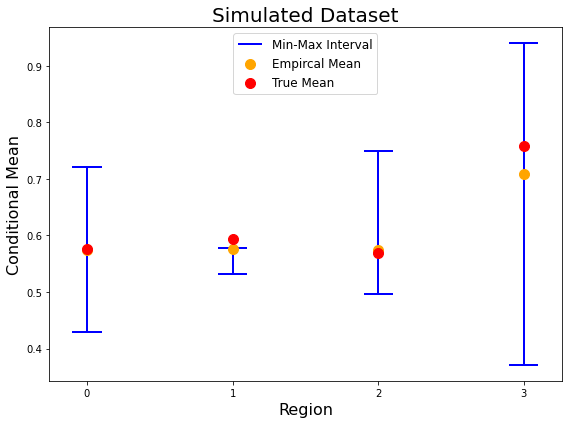

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the data
# df = pd.read_csv('../experiment_artifacts/Dec01-0138/plotting_df.csv')
#their data
# df = pd.read_csv('../experiment_artifacts/Dec01-1915/plotting_df.csv')
# df0 = pd.read_csv('../experiment_artifacts/Dec01-1927/plotting_df.csv') # upper peninsual
df0 = pd.read_csv('../experiment_artifacts/Dec01-2020/plotting_df.csv')
# df1 = pd.read_csv('../experiment_artifacts/Dec01-1932/plotting_df.csv') # detroit_sc_se
df1 = pd.read_csv('../experiment_artifacts/Dec01-1951/plotting_df.csv')
# df2 = pd.read_csv('../experiment_artifacts/Dec01-1934/plotting_df.csv') # ann_arbor_puma
df2 = pd.read_csv('../experiment_artifacts/Dec01-2017/plotting_df.csv') # ann_arbor_puma
df3 = pd.read_csv('../experiment_artifacts/Dec01-1915/plotting_df.csv') #all regions as one


# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

for df, idx in zip([df0, df1, df2, df3], range(4)) :
    ax.vlines(
        x=idx,
        ymin=df['min_bound'][0],
        ymax=df['max_bound'][0],
        color='blue',
        linewidth=2,
        label='Min-Max Interval'
    )
    ax.scatter(
        x=idx,
        y=df['empirical_conditional_mean'][0],
        color='orange',
        s=100,
        label='Empirical Mean',
        zorder=3
    )
    ax.scatter(
        x=idx,
        y=df['true_conditional_mean'][0],
        color='red',
        s=100,
        label='True Mean',
        zorder=3
    )
    ax.hlines(
    y=df['min_bound'][0],
    xmin=idx-0.1,
    xmax=idx+0.1,
    color='blue',
    linewidth=2,
    )
    ax.hlines(
    y=df['max_bound'][0],
    xmin=idx-0.1,
    xmax=idx+0.1,
    color='blue',
    linewidth=2,
    )
    

ax.set_title("Simulated Dataset", fontsize=20)
ax.set_xlabel("Region", fontsize=16)
ax.set_ylabel("Conditional Mean", fontsize=16)

# Add legend
ax.legend(fontsize=12, 
          labels = ['Min-Max Interval', 'Empircal Mean', 'True Mean'], 
          loc='upper center')

ax.set_xticks(range(4))

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Display the plot
plt.show()